In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections as col
#Utilizando community detection de python-louvain
import community as com

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="33eca6309d3344028987abab11e234bc",
                                                           client_secret="25f6177ad5db47b687266bfdd2e990e2"))

In [4]:
hot100 = pd.read_excel("Hot 100 Audio Features.xlsx")

In [4]:
import requests
import spotipy.util as sputil
import json

In [5]:
SEARCH_PLAYLIST_ENDPOINT ='https://api.spotify.com/v1/search?type=playlist'

def search_playlist(name):
    path = 'token.json'
    with open(path) as t:
        token = json.load(t)
    myparams = {'type': 'playlilst'}
    myparams['q'] = name
    resp = requests.get(SEARCH_PLAYLIST_ENDPOINT, params=myparams, headers={"Authorization": "Bearer {}".format(token)})
    pprint (resp.json())
    return resp.json()


def query_playlist(playlist):

    path = 'token.json'
    with open(path) as t:
        token = json.load(t)

    sp = spotipy.Spotify(auth=token)

    data = search_playlist(playlist)
    # get playlists
    playlists = data['playlists']['items']

    for playlist in playlists:
        uri = playlist['uri']
        username = uri.split(':')[2]
        playlist_id = uri.split(':')[4]
        # query playlists
        results = sp.user_playlist(username, playlist_id)
        # separate data by track
        tracks = results['tracks']           
        # lookup       
        for item in tracks['items']:
            track = item['track']
            artist = track['artists'][0]['name']
            print(artist)

In [6]:
# BUSCAR LOS ARTISTAS Y FORMAR GRAFOS
def formarGrafo(dataframe,_id,name):
    G = nx.Graph()
    errores = 0
    for index, row in dataframe.iterrows():
        res = str(row[_id])
        if len(res) > 3:
            try:
                result = sp.track(res)
            except:
                errores +=1
            else:
                artists = result["artists"]
                index = 0
                while index < len(artists) -1:
                    indexb = index+1
                    while indexb < len(artists):
                        G.add_edge(artists[index]["name"], artists[indexb]["name"],Song = str(row[name]))
#                         G.add_edge(artists[index]["name"], artists[indexb]["name"])                      
                        indexb+=1
                    index+=1
    return G,errores

In [8]:
# creamos un grafo vacio
G_billboard = nx.Graph()

In [9]:
hot100.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,0.0,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,1.0,196760.0,86.0,...,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,1.0,228185.0,61.0,...,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


In [10]:
# errores = 0
# for index, row in hot100.iterrows():
#     res = str(row["spotify_track_id"])
#     if len(res) > 3:
#         try:
#             result = sp.track(res)
#         except:
#             errores +=1
#         else:
#             artists = result["artists"]
#             index = 0
#             while index < len(artists) -1:
#                 indexb = index+1
#                 while indexb < len(artists):
#                     G.add_edge(artists[index]["name"], artists[indexb]["name"])
#                     indexb+=1
#                 index+=1

In [11]:
G_billboard, errores = formarGrafo(hot100,"spotify_track_id","Song")

In [12]:
errores

1

In [13]:
len(G_billboard.nodes())

2337

In [14]:
len(G_billboard.edges())

5101

In [15]:
sorted(G_billboard.degree, key=lambda x: x[1], reverse=True)

[('Lil Wayne', 89),
 ('Drake', 66),
 ('Nicki Minaj', 66),
 ('Chris Brown', 65),
 ('Kanye West', 63),
 ('Fat Joe', 54),
 ('JAY-Z', 51),
 ('Future', 50),
 ('T-Pain', 49),
 ('Ludacris', 49),
 ('DJ Khaled', 45),
 ('Travis Scott', 43),
 ('Jennifer Lopez', 43),
 ('Snoop Dogg', 42),
 ('Big Sean', 42),
 ('Jimmy McHugh', 39),
 ('Dorothy Fields', 39),
 ('Arthur Ferrante', 39),
 ('Louis Teicher', 39),
 ('Bill Shepherd', 39),
 ('Bill Snyder', 39),
 ('Charles Williams', 39),
 ('David Rose', 39),
 ('Frank Chacksfield', 39),
 ('George Greeley', 39),
 ('George Liberace', 39),
 ('Marty Gold', 39),
 ('Michael Collins', 39),
 ('Morris Stoloff', 39),
 ('Morton Gould', 39),
 ('Percy Faith', 39),
 ('Robert Farnon', 39),
 ('Roberto Inglez', 39),
 ('Ron Goodwin', 39),
 ('Stanley Black', 39),
 ('Victor Young', 39),
 ('Bill Shepherd Orchestra', 39),
 ('Bill Snyder Orchestra', 39),
 ('Charles Williams Concert Orchestra', 39),
 ('David Rose Orchestra', 39),
 ('Frank Chacksfield Orchestra', 39),
 ('George Greeley 

C:\Users\Alberto\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


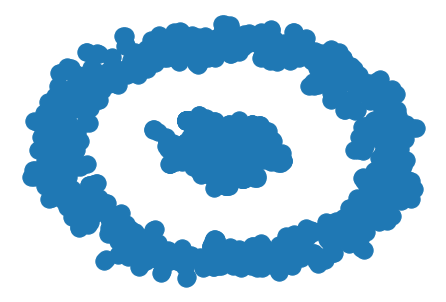

In [16]:
nx.draw(G_billboard)
plt.show()

In [17]:
# guardamos el grafo para estudiarlo en gephi
nx.write_gexf(G_billboard,"billboard1.gexf")

In [18]:
# import spotifycharts

In [19]:
# from spotifycharts import downloader
# sc_downloader = downloader.Downloader(name='regional',
#                                       periodicity='weekly',
#                                       region_names=['global'],
#                                       begin_date='30-12-2019',
#                                       end_date='05-01-2021',
#                                       cpu_count=2,
#                                       file_path='dataSpotifyCharts.csv')
# sc_downloader.download()

In [15]:
from fycharts.SpotifyCharts import SpotifyCharts

api = SpotifyCharts()
# api.top200Daily(output_file = "top_200_daily.csv",region="global")
api.top200Weekly(output_file="GLOBAL_top_200_weekly.csv", start = "2016-12-23", region = "global")
api.top200Weekly(output_file="SPAIN_top_200_weekly.csv",start = "2016-12-23", region = "es")


INFO : 20/01/2021 07:24:50 PM : Extracting top 200 weekly for 2016-12-23--2016-12-30 - global
INFO : 20/01/2021 07:24:51 PM : Extracting top 200 weekly for 2016-12-30--2017-01-06 - global
INFO : 20/01/2021 07:24:51 PM : Appending data to the file GLOBAL_top_200_weekly.csv...
INFO : 20/01/2021 07:24:51 PM : Done appending to the file GLOBAL_top_200_weekly.csv!!!
INFO : 20/01/2021 07:24:52 PM : Extracting top 200 weekly for 2017-01-06--2017-01-13 - global
INFO : 20/01/2021 07:24:52 PM : Appending data to the file GLOBAL_top_200_weekly.csv...
INFO : 20/01/2021 07:24:52 PM : Done appending to the file GLOBAL_top_200_weekly.csv!!!
INFO : 20/01/2021 07:24:54 PM : Extracting top 200 weekly for 2017-01-13--2017-01-20 - global
INFO : 20/01/2021 07:24:54 PM : Appending data to the file GLOBAL_top_200_weekly.csv...
INFO : 20/01/2021 07:24:54 PM : Done appending to the file GLOBAL_top_200_weekly.csv!!!
INFO : 20/01/2021 07:24:55 PM : Extracting top 200 weekly for 2017-01-20--2017-01-27 - global
IN

In [7]:
# G_Global_weekly = nx.Graph()
globalWeekly = pd.read_csv("GLOBAL_top_200_weekly.csv")
globalWeekly.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,Starboy,The Weeknd,25286465,2016-12-23--2016-12-30,global,5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,22047697,2016-12-23--2016-12-30,global,7BKLCZ1jbUBVqRi2FVlTVw
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,19794482,2016-12-23--2016-12-30,global,5knuzwU65gJK7IF5yJsuaW
3,4,Let Me Love You,DJ Snake,17965723,2016-12-23--2016-12-30,global,4pdPtRcBmOSQDlJ3Fk945m
4,5,Don't Wanna Know,Maroon 5,16966668,2016-12-23--2016-12-30,global,5MFzQMkrl1FOOng9tq6R9r


In [22]:
# errores = 0
# for index, row in globalWeekly.iterrows():
#     res = str(row["spotify_id"])
#     if len(res) > 3:
#         try:
#             result = sp.track(res)
#         except:
#             errores +=1
#         else:
#             artists = result["artists"]
#             index = 0
#             while index < len(artists) -1:
#                 indexb = index+1
#                 while indexb < len(artists):
#                     G_Global_weekly.add_edge(artists[index]["name"], artists[indexb]["name"])
#                     indexb+=1
#                 index+=1

In [ ]:
G_Global_weekly, errores = formarGrafo(globalWeekly,"spotify_id", "Track Name")

HTTP Error for GET to https://api.spotify.com/v1/tracks/spotify_id returned 400 due to invalid id


In [ ]:
errores

In [11]:
len(G_Global_weekly.nodes())

NodeView(('The Weeknd', 'Daft Punk', 'The Chainsmokers', 'Halsey', 'Clean Bandit', 'Sean Paul', 'Anne-Marie', 'DJ Snake', 'Justin Bieber', 'Maroon 5', 'Kendrick Lamar'))

In [ ]:
len(G_Global_weekly.edges())

In [ ]:
sorted(G_Global_weekly.degree, key=lambda x: x[1], reverse=True)

In [ ]:
# guardamos el grafo para estudiarlo en gephi
nx.write_gexf(G_Global_weekly,"spotifyGlobalWeekly1.gexf")

In [ ]:
G_Spain = nx.Graph()
spain_weekly = pd.read_csv("SPAIN_top_200_weekly.csv")
spain_weekly.head()

In [ ]:
# errores = 0
# for index, row in spain_weekly.iterrows():
#     res = str(row["spotify_id"])
#     if len(res) > 3:
#         try:
#             result = sp.track(res)
#         except:
#             errores +=1
#         else:
#             artists = result["artists"]
#             index = 0
#             while index < len(artists) -1:
#                 indexb = index+1
#                 while indexb < len(artists):
#                     G_Spain.add_edge(artists[index]["name"], artists[indexb]["name"])
#                     indexb+=1
#                 index+=1

In [ ]:
G_Spain, errores = formarGrafo(G_Spain,globalWeekly,"spotify_id", "Track Name")

In [ ]:
errores

In [ ]:
len(G_Spain.nodes())

In [ ]:
len(G_Spain.edges())

In [ ]:
sorted(G_Spain.degree, key=lambda x: x[1], reverse=True)

In [ ]:
# guardamos el grafo para estudiarlo en gephi
nx.write_gexf(G_Spain,"spotifySpainWeekly1.gexf")